In [19]:
# _*_ coding:utf-8 _*_
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


 


In [20]:
discfile = "/Users/candy/Documents/资源/研究生工作/浙江理工/数学建模/code/data/"
file = discfile + "excel4.xlsx"

#读取文件
data = pd.read_excel(file, sheet_name=7,index_col = u'data')
data


,changchun
data,
2022-03-26,12.654
2022-03-27,11.400
2022-03-28,31.000
2022-03-29,108.000
2022-03-30,212.000
2022-03-31,112.000
2022-04-01,40.000
2022-04-02,80.000
2022-04-03,44.000


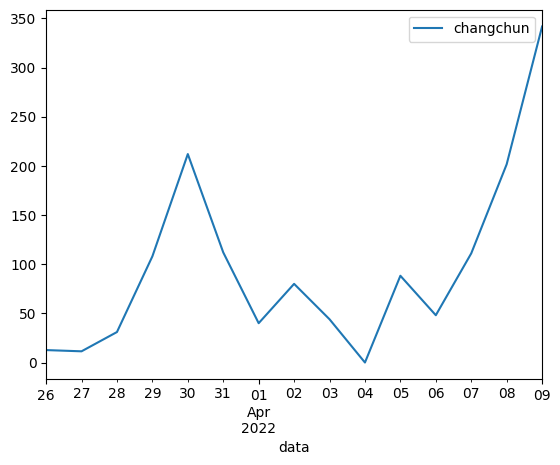

In [21]:
#补全中文
# plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
# plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
data.plot()
plt.show()

原始序列的ADF检验结果为： (-0.3691065496744993, 0.9151305019079896, 0, 14, {'1%': -4.01203360058309, '5%': -3.1041838775510207, '10%': -2.6909873469387753}, 105.78405296334472)


/Users/candy/anaconda3/envs/modeling2/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


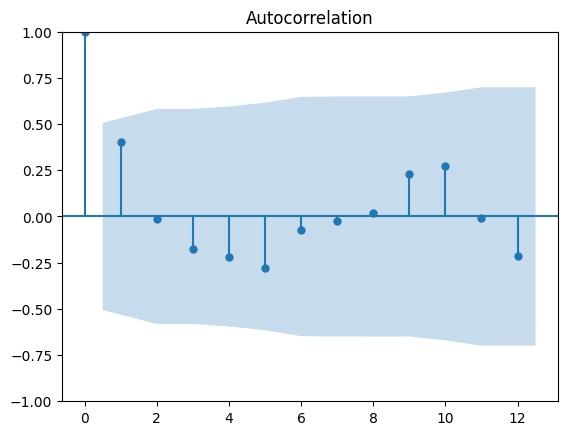

In [22]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data).show()
from statsmodels.tsa.stattools import adfuller as ADF
print(u'原始序列的ADF检验结果为：', ADF(data[u'changchun']))

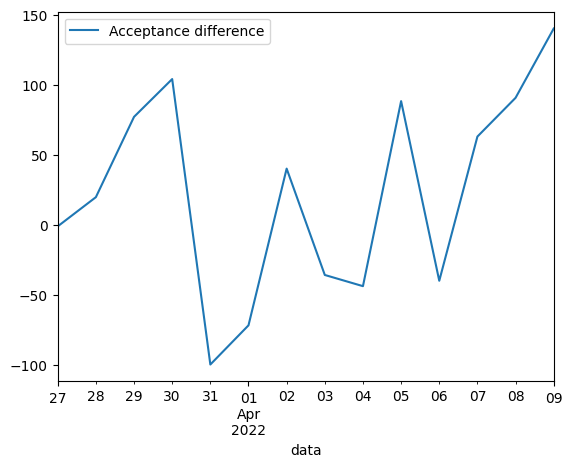

差分序列的ADF检验结果为： (1.424131523127255, 0.9972210571048716, 5, 8, {'1%': -4.6651863281249994, '5%': -3.3671868750000002, '10%': -2.802960625}, 81.19986163537683)
差分序列的白噪声检验结果为：     lb_stat  lb_pvalue
1  0.168283   0.681643


/Users/candy/anaconda3/envs/modeling2/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


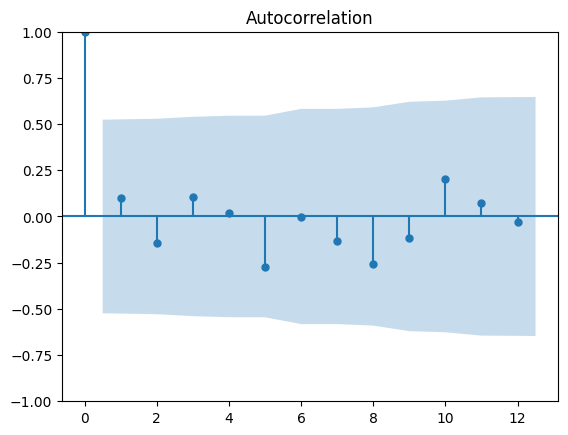

In [23]:
# 差分后的结果
D_data = data.diff().dropna()
D_data.columns = [u'Acceptance difference']
D_data.plot()  # 时序图
plt.show()
plot_acf(D_data).show()  # 自相关图
from statsmodels.graphics.tsaplots import plot_pacf
# plot_pacf(D_data).show()  # 偏自相关图
print(u'差分序列的ADF检验结果为：', ADF(D_data[u'Acceptance difference']))  # 平稳性检测

# 白噪声检验
from statsmodels.stats.diagnostic import acorr_ljungbox
print(u'差分序列的白噪声检验结果为：', acorr_ljungbox(D_data, lags=1))  # 返回统计量和p值

In [24]:
# from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
p=4
q=2
model = sm.tsa.arima.ARIMA(data, order=(p,1,q)).fit()  # 建立ARIMA(0, 1, 1)模型
model
# print('模型报告为：\n', model.summary())
print('预测未来5天，其预测结果、标准误差、置信区间如下：\n', model.forecast(5))

预测未来5天，其预测结果、标准误差、置信区间如下：
 2022-04-10    336.897081
2022-04-11    363.674467
2022-04-12    422.357108
2022-04-13    401.953593
2022-04-14    376.786744
Freq: D, Name: predicted_mean, dtype: float64


/Users/candy/anaconda3/envs/modeling2/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/candy/anaconda3/envs/modeling2/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/candy/anaconda3/envs/modeling2/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/candy/anaconda3/envs/modeling2/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/candy/anaconda3/envs/modeling2/lib/